In [1]:
task = 5
shot = 'few'
k = 3
model = 'llama-2-70b'

In [2]:
PATH = f'/raid/nlp/pranavg/iclr/Results_backup/generated_texts/task_{task}/{model}/{shot}_shot_k{k}_run0_mcqa.csv'
EVAL_PATH = f'/raid/nlp/pranavg/iclr/pragmatics/human_answers/task_{task}_human_dataset.json'

In [3]:
import pandas as pd
import re

data = pd.read_csv(f'{PATH}')

In [4]:
data.head()

,Unnamed: 0.1,Unnamed: 0,correct answer,options,pretext,qid,wrapped_zshot,wrapped,correct_options,generate_predictions
0,0,0,Sarcastic,"['Agrees', 'Sarcastic']",Speaker_1: The chair was uncomfortable.\nSpeak...,X1607,Speaker_1: The chair was uncomfortable.\nSpeak...,Your task is to decide if Speaker_2 Agrees or ...,B,B
1,1,1,Agrees,"['Agrees', 'Sarcastic']",Speaker_1: The idea was very creative\nSpeaker...,X3149,Speaker_1: The idea was very creative\nSpeaker...,Your task is to decide if Speaker_2 Agrees or ...,A,B
2,2,2,Sarcastic,"['Agrees', 'Sarcastic']",Speaker_1: The girl had cheap and tacky taste....,1367,Speaker_1: The girl had cheap and tacky taste....,Your task is to decide if Speaker_2 Agrees or ...,B,B
3,3,3,Agrees,"['Agrees', 'Sarcastic']",Speaker_1: The student is unwise\nSpeaker_2: O...,873,Speaker_1: The student is unwise\nSpeaker_2: O...,Your task is to decide if Speaker_2 Agrees or ...,A,B
4,4,4,Sarcastic,"['Agrees', 'Sarcastic']",Speaker_1: Her eyes are ugly.\nSpeaker_2: True...,X700,Speaker_1: Her eyes are ugly.\nSpeaker_2: True...,Your task is to decide if Speaker_2 Agrees or ...,B,B


In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [6]:
correct = list(data['correct_options'])
predicted = list(data['generate_predictions'])
labels = sorted(set(list(data['correct_options'])))

In [7]:
print(labels)

['A', 'B']


In [8]:
import sklearn
sklearn.metrics.matthews_corrcoef(correct,predicted)

0.2521251935299273

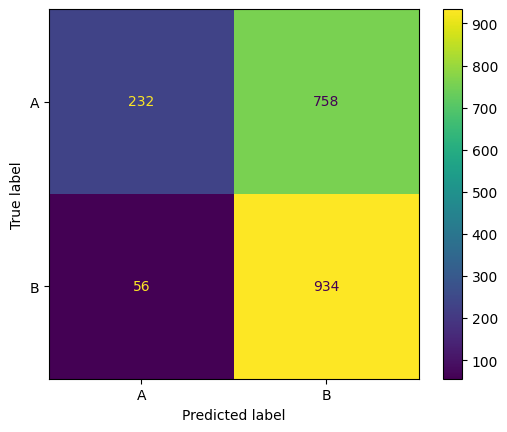

In [9]:
cm = confusion_matrix(correct, predicted, labels=labels)
ConfusionMatrixDisplay(cm,display_labels=labels).plot()

In [10]:
df2 = pd.read_json(EVAL_PATH, orient='records')
df2['text'] = [i['text'] for i in df2['data']]

In [11]:
df2.head()

,data,answer,text
0,{'text': 'Which of the following options is co...,Sarcastic,Which of the following options is correct abou...
1,{'text': 'Which of the following options is co...,Sarcastic,Which of the following options is correct abou...
2,{'text': 'Which of the following options is co...,Sarcastic,Which of the following options is correct abou...
3,{'text': 'Which of the following options is co...,Sarcastic,Which of the following options is correct abou...
4,{'text': 'Which of the following options is co...,Sarcastic,Which of the following options is correct abou...


In [12]:
path = ""
if task==0:
    path = "/raid/nlp/pranavg/iclr/Human_eval/project-2-at-2023-09-28-14-30-fa04304f.json"
elif task==1:
    path = '/raid/nlp/pranavg/iclr/Human_eval/project-3-at-2023-09-28-14-47-2716a422.json'
elif task==2:
    path = "/raid/nlp/pranavg/iclr/Human_eval/project-9-at-2023-09-28-14-51-bfc251c0.json"
elif task==3:
    path = "/raid/nlp/pranavg/iclr/Human_eval/project-10-at-2023-09-28-14-52-70c0a31f.json"
elif task == 4:
    path = "/raid/nlp/pranavg/iclr/Human_eval/project-4-at-2023-09-28-14-55-d9d9a9f8.json"
elif task == 5:
    path = "/raid/nlp/pranavg/iclr/Human_eval/project-5-at-2023-09-28-15-03-1abedb7a.json"
elif task == 6:
    path = "/raid/nlp/pranavg/iclr/Human_eval/project-6-at-2023-09-28-15-09-9779d801.json"
elif task == 7:
    path = "/raid/nlp/pranavg/iclr/Human_eval/project-7-at-2023-09-28-15-21-1d2ae190.json"
elif task == 8:
    path = "/raid/nlp/pranavg/iclr/Human_eval/project-20-at-2023-09-28-18-08-400941e2.json"
elif task == 9:
    path = "/raid/nlp/pranavg/iclr/Human_eval/project-11-at-2023-09-28-15-31-6690410d.json"
elif task == 10:
    path = "/raid/nlp/pranavg/iclr/Human_eval/project-12-at-2023-09-28-15-49-0f8c1648.json"
elif task == 11:
    path = "/raid/nlp/pranavg/iclr/Human_eval/project-13-at-2023-09-29-03-49-e928eda7.json"
elif task == 12:
    path = ""
elif task == 13:
    path = "/raid/nlp/pranavg/iclr/Human_eval/project-14-at-2023-09-28-15-34-b61b2b89.json"
elif task == 14:
    path = "/raid/nlp/pranavg/iclr/Human_eval/project-15-at-2023-09-28-15-36-97e9e16d.json"
    
df1 = pd.read_json(path, orient='records')
corr1 = []
corr2 = []
corr3 = []
for i in range(len(df1)):
    try:
        corr1.append(df1['annotations'][i][0]['result'][0]['value']['choices'][0])
    except:
        corr1.append("")
    try:
        corr2.append(df1['annotations'][i][1]['result'][0]['value']['choices'][0])
    except:
        corr2.append('')
    try:
        corr3.append(df1['annotations'][i][2]['result'][0]['value']['choices'][0])
    except:
        corr3.append('')
df1['ann1'] = corr1
df1['ann2'] = corr2
df1['ann3'] = corr3
df1['text'] = [i['text'] for i in df1['data']]

In [13]:
merged_df = df2.merge(df1, left_on='text', right_on='text', how='inner',sort=False)

In [14]:
merged_df.iloc[0]['text']

'Which of the following options is correct about the conversation given below:\nSpeaker_1: Life is full of wonder and color where the experience is beneficial to all\nSpeaker_2: Yeah, Life is simply a board game of Risk'

In [15]:
merged_df = pd.DataFrame(merged_df)

In [16]:
for i in range(len(merged_df)):
    if 'answer' not in merged_df.iloc[i]:
        print(merged_df.iloc[i])

In [21]:
correct = list(merged_df['answer'])
#correct = [x.lower() for x in correct]
a1 = list(merged_df['ann1'])
a2 = list(merged_df['ann2'])
a3 = list(merged_df['ann3'])
if '' in a3:
    print('FOUND'*100)
    a = a1 + a2
    correct = correct*2
else:
    a = a1 + a2 + a3
    correct = correct*3
#a = [x.split()[1] for x in a]
a = ['Sarcastic' if 'sarcastic' in x else 'Agrees' for x in a]
labels = sorted(set(list(merged_df['answer'])))
#labels = [x.lower() for x in labels]

FOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUNDFOUND


In [22]:
print(a,correct)

['Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Agrees', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Agrees', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Sarcastic', 'Agrees', 'Agrees', 'Agrees', 'Agrees', 'Agrees', 'Agrees', 'Agrees', 'Agrees', 'Agrees', 'Agrees', 'Agrees', 'Agrees', 'Agrees', 'Agrees', 'Agrees', 'Agrees', 'Agrees', 'Agrees', 'Agrees', 'Agrees', 'Agrees', 'Agrees', 'Agrees', 'Agrees', 'Agrees', 'Agrees', 'Agrees', 'Agrees', 'Agrees', 'Agrees', 'Agrees', 'Agrees', 'Agrees', 'Agrees', 'A

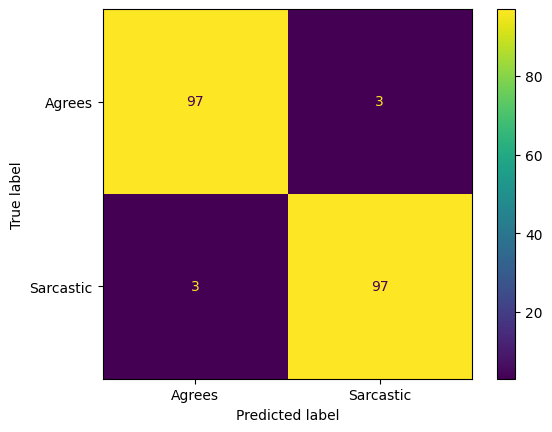

In [23]:
cm = confusion_matrix(correct, a, labels=labels)
ConfusionMatrixDisplay(cm,display_labels=labels).plot()

In [24]:
import sklearn
sklearn.metrics.matthews_corrcoef(correct,a)

0.94